In [1]:
# importing required packages
import networkx as nx 
import matplotlib.cbook
from collections import defaultdict
import numpy as np

In [2]:
#Defining class to create the graph
class Graph:
    #Constructor used to initialise an object
    def __init__(self, vlist = []):
        self.index = {v:i for i,v in enumerate(vlist)}    # looks up index given name
        self.vertex = {i:v for i,v in enumerate(vlist)}   # looks up name given index
        self.edge = []
        self.edgelabel = []
    #addEdge function to add the edges
    def addEdge(self, vsrc, vdst, label='', repeats=True):
        e = (self.index[vsrc], self.index[vdst])
        if (repeats) or (e not in self.edge):
            self.edge.append(e)
            self.edgelabel.append(label)
    #addVertex function to add the vertices
    def addVertex(self, label):
        index = len(self.index)
        self.index[label] = index
        self.vertex[index] = label 
    #Function to find degrees of a node
    def degrees(self):
        inDegree = {}
        outDegree = {}
        for src, dst in self.edge:
            outDegree[src] = outDegree.get(src, 0) + 1
            inDegree[dst] = inDegree.get(dst, 0) + 1
        return inDegree, outDegree
    #verifyAndGetStart used to obtain the starting kmer node
    def verifyAndGetStart(self):
        inDegree, outDegree = self.degrees()
        start, end = 0, 0
        # node 0 will be the starting node is a Euler cycle is found
        for vert in self.vertex:
            ins = inDegree.get(vert,0)
            outs = outDegree.get(vert,0)
            if (ins == outs):
                continue
            elif (ins - outs == 1):
                end = vert
            elif (outs - ins == 1):
                start = vert
            else:
                start, end = -1, -1
                break
        if (start >= 0) and (end >= 0):
            return start
        else:
            return -1
    
    #Function to find the Eulerian Path
    def eulerianPath(self):
        graph = [(src,dst) for src,dst in self.edge]
        currentVertex = self.verifyAndGetStart()
        path = [currentVertex]
        # "next" is the list index where vertices get inserted into our tour
        # it starts at the end (i.e. same as appending), but later "side-trips" will insert in the middle
        next = 1
        while (len(graph) > 0):                   # when all edges are used, len(graph) == 0
            # follows a path until it ends
            for edge in graph:
                if (edge[0] == currentVertex):
                    currentVertex = edge[1]
                    graph.remove(edge)
                    path.insert(next, currentVertex)  # inserts vertex in path
                    next += 1
                    break
            else:
                # Look for side-trips along the current path
                for edge in graph:
                    try:
                        # insert our side-trip after the "u" vertex that is starts from
                        next = path.index(edge[0]) + 1
                        currentVertex = edge[0]
                        break
                    except ValueError:
                        continue
                else:
                    print("There is no path!")
                    return False
        return path
    #Function to find the Euler Edges from the given edges
    def eulerEdges(self, starting, path):
        edgeId = {}
        for i in range(len(self.edge)):
            edgeId[self.edge[i]] = edgeId.get(self.edge[i], []) + [i]
        edgeList = [self.vertex[starting]]
        for i in range(len(path)-1):
            edgeList.append(self.edgelabel[edgeId[path[i],path[i+1]].pop()])
        return edgeList           

In [3]:
#Function used to retrieve the kmers
def get_kmers(seq,k):
    kmerlist = []
    for i in range(len(seq)-k+1):
        kmerlist.append(seq[i:i+k])
    return kmerlist

In [4]:
seq = "TGCGGTAATGCAGTTGACT"
k = 3
kmers = get_kmers(seq, k)
g = Graph()
Vertex = list(set(kmers))
for val in Vertex:
    g.addVertex(val)
for i in range(len(kmers) - 1):
    g.addEdge(kmers[i], kmers[i+1], kmers[i+1])

In [5]:
path = g.eulerianPath()
print(path)

[3, 13, 8, 0, 15, 5, 2, 14, 3, 11, 12, 4, 7, 6, 9, 1, 10]


In [6]:
#Obtaining the indegree and outdegree of the nodes
indegree, outdegree = g.degrees()

In [7]:
#Obtaining the starting index
start_index = g.verifyAndGetStart()
#Printing the starting node index
start_index

3

In [8]:
#Printing the vertices of the graph
g.vertex

{0: 'GGT',
 1: 'GAC',
 2: 'AAT',
 3: 'TGC',
 4: 'AGT',
 5: 'TAA',
 6: 'TTG',
 7: 'GTT',
 8: 'CGG',
 9: 'TGA',
 10: 'ACT',
 11: 'GCA',
 12: 'CAG',
 13: 'GCG',
 14: 'ATG',
 15: 'GTA'}

In [9]:
#Printing the Euler Edges
Euler_edge = g.eulerEdges(start_index, path)
Euler_edge

['TGC',
 'GCG',
 'CGG',
 'GGT',
 'GTA',
 'TAA',
 'AAT',
 'ATG',
 'TGC',
 'GCA',
 'CAG',
 'AGT',
 'GTT',
 'TTG',
 'TGA',
 'GAC',
 'ACT']

In [10]:
#Reconstruction from Euler Path
recons_seq = Euler_edge[0]
for i in range (1, len(Euler_edge)):
        recons_seq = recons_seq + Euler_edge[i][-1]
#Printing the sequence obtained from the Eulerian Path from De bruijn Graph
print(recons_seq)

TGCGGTAATGCAGTTGACT


In [11]:
#Printing the edges in indices representation
g.edge

[(3, 13),
 (13, 8),
 (8, 0),
 (0, 15),
 (15, 5),
 (5, 2),
 (2, 14),
 (14, 3),
 (3, 11),
 (11, 12),
 (12, 4),
 (4, 7),
 (7, 6),
 (6, 9),
 (9, 1),
 (1, 10)]

In [12]:
#The edge labels stored
g.edgelabel

['GCG',
 'CGG',
 'GGT',
 'GTA',
 'TAA',
 'AAT',
 'ATG',
 'TGC',
 'GCA',
 'CAG',
 'AGT',
 'GTT',
 'TTG',
 'TGA',
 'GAC',
 'ACT']

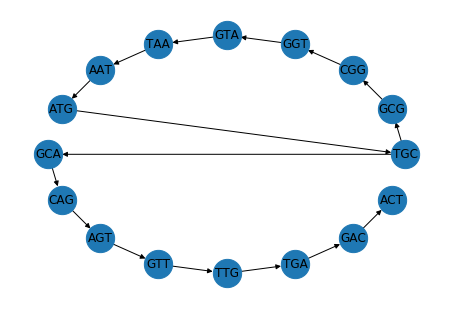

In [14]:
#Creating a directed Graph
dgraph = nx.DiGraph()
for i in range(len(path)-1):
    dgraph.add_edge(g.vertex[path[i]], g.vertex[path[i+1]])
#Drawing the directed graph
nx.draw_shell(dgraph,with_labels = True,node_size=800)